**SMS-Message-Spam-Detector**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('spam.csv', encoding="latin-1")

In [3]:
df.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [4]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [5]:
df = df.rename(columns={"v1":"label", "v2":"message"})

In [6]:
df.head(3)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [7]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
df.groupby("label").describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [9]:
print('This dataset contains ',df.shape[0],'rows')
print('This dataset contains ',df.shape[1],'columns')

This dataset contains  5572 rows
This dataset contains  2 columns


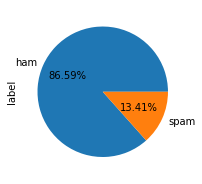

In [10]:
plt.figure(figsize=(3,3))
pd.Series(df['label']).value_counts().plot(kind ='pie', autopct='%1.2f%%')

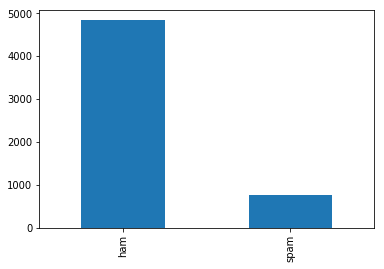

In [11]:
df.label.value_counts().plot.bar();

In [12]:
# Converting the Target Feature to Binary for Later Modelling and Visualizing Purposes 

df['label'] = df['label'].map({'spam':1, 'ham':0})

In [13]:
df.head(3)

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [14]:
X = df['message']
y = df['label']

In [15]:
cv = CountVectorizer()

In [16]:
X_cv = cv.fit_transform(X).toarray() # Fit the Data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_cv, y, test_size=0.33, random_state=0)

In [18]:
## Naive Bayes Classifier

clf = MultinomialNB()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9820554649265906

In [19]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1578
           1       0.93      0.94      0.94       261

   micro avg       0.98      0.98      0.98      1839
   macro avg       0.96      0.97      0.96      1839
weighted avg       0.98      0.98      0.98      1839



In [20]:
# persist the model for future 
import pickle

with open('NB_spam_model.pkl','wb') as f:
    pickle.dump(clf,f)

with open('cv.pkl','wb') as f:
    pickle.dump(cv,f)


In [21]:
# Loading to use the Saved Model in Pickle File Format
with open('NB_spam_model.pkl','rb') as f:
    sms_clf = pickle.load(f)

with open('cv.pkl','rb') as f:
    text_cv = pickle.load(f)


In [22]:
# predicting 
sample = text_cv.transform(["Congratulations you won 100000 prize"]).toarray()

sms_clf.predict(sample)

array([1], dtype=int64)